In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 

In [2]:
data = pd.read_csv('C:/Users/Lakshya/Codes/ml/digit.csv')


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)

In [5]:
m, n = data.shape
np.random.shuffle(data)
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_, m_train = X_train.shape

In [6]:
def params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    A = np.exp(Z)/sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X)+b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1)+b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLu_def(Z):
    return Z>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y 

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2)*ReLu_def(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha*dW1
    W2 = W2 - alpha*dW2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2
    return W1, b1, W2, b2


In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

def gradient_desc(X, Y, alpha, iterations):
    W1, b1, W2, b2 = params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%10:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_desc(X_train, Y_train, 0.10, 500)

Iteration:  1
[6 9 3 ... 9 6 3] [9 6 2 ... 0 3 0]
0.09670731707317073
Iteration:  2
[6 9 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.10526829268292683
Iteration:  3
[6 9 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.11519512195121952
Iteration:  4
[6 9 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.12546341463414634
Iteration:  5
[6 9 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.1360487804878049
Iteration:  6
[6 9 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.14673170731707316
Iteration:  7
[6 9 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.15539024390243902
Iteration:  8
[6 9 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.16431707317073171
Iteration:  9
[6 9 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.174390243902439
Iteration:  11
[6 9 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.18995121951219512
Iteration:  12
[6 1 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.19726829268292684
Iteration:  13
[6 1 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.20502439024390243
Iteration:  14
[6 1 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.21180487804878048
Iteration:  15
[6 1 4 ... 9 6 6] [9 6 2 ... 0 3 0]
0.21897560975609756
Iteration:  16
[6 

In [9]:
def make_predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [11]:
def test_predict(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predict(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction:", prediction)
    print("label:", label)
    current_image = current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show

Prediction: [9]
label: 9
Prediction: [6]
label: 6
Prediction: [2]
label: 2


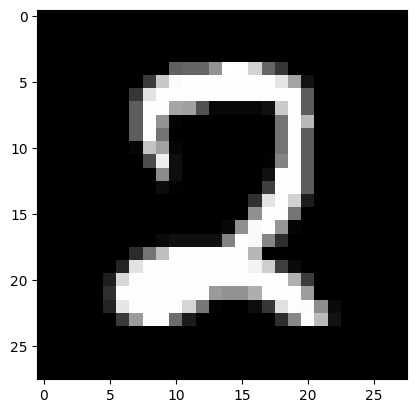

In [15]:
test_predict(0,W1,b1,W2,b2)
test_predict(1,W1,b1,W2,b2)
test_predict(2,W1,b1,W2,b2)

In [16]:
dev_predict = make_predict(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predict, Y_dev)

[8 4 7 4 5 8 1 2 8 0 4 6 3 2 6 2 1 1 7 6 5 3 5 1 6 9 8 8 0 8 4 9 3 9 5 2 4
 6 3 2 6 2 6 9 6 2 1 7 8 8 6 9 4 0 1 2 4 3 0 9 4 8 9 6 5 3 2 9 5 0 8 8 2 8
 6 9 8 3 2 3 7 1 0 1 1 1 0 2 1 5 5 8 0 7 9 5 4 7 0 6 4 6 9 7 8 1 8 9 2 4 8
 1 6 2 5 0 7 7 7 5 3 2 2 1 2 8 4 3 8 2 5 1 2 5 4 9 9 1 1 3 2 4 9 1 1 6 0 1
 3 8 4 3 2 5 1 1 0 1 3 4 0 0 4 4 5 3 4 4 9 3 3 1 6 2 6 3 4 6 5 3 3 1 1 2 7
 0 4 8 6 5 1 1 3 9 8 5 9 4 5 6 0 7 9 7 1 5 0 1 4 3 0 3 7 9 2 7 3 4 6 7 4 3
 1 7 0 6 9 0 4 6 9 1 1 5 7 0 6 4 8 6 8 6 8 3 7 7 1 1 6 3 6 7 2 3 3 7 9 3 8
 0 6 5 8 1 3 0 1 2 2 9 1 7 2 3 3 2 8 3 6 3 9 8 2 3 9 1 5 8 3 9 7 7 2 4 4 1
 8 7 1 9 9 4 7 2 3 8 8 8 3 6 7 1 4 7 7 2 6 9 3 7 3 2 9 6 0 6 8 3 3 9 8 3 7
 4 9 3 8 4 9 8 1 9 1 3 7 5 7 1 4 2 5 8 7 7 0 6 9 1 4 3 0 7 5 3 5 7 1 2 7 5
 5 3 2 2 5 4 9 1 4 6 1 9 3 5 3 2 1 3 9 3 6 9 7 2 7 9 9 1 1 5 8 5 3 4 2 1 0
 4 6 4 8 9 0 8 4 6 7 5 1 8 3 4 5 3 3 1 5 2 6 6 9 3 0 0 8 9 6 8 4 6 3 0 9 0
 8 9 7 7 1 9 0 6 7 0 9 2 8 5 0 7 4 1 3 8 1 7 9 9 3 3 6 9 3 0 9 1 2 0 7 8 4
 1 4 7 7 0 5 7 6 7 3 2 3 

np.float64(0.849)